# TRABALHO FINAL DE ICD - IDENTIFICACAO DE FRAUDES

## INTRODUCAO



Este trabalho foi feito utilizando um dataset sintético para detecçâo de fraude. O dataset pode ser encontrado em https://www.kaggle.com/ealaxi/paysim1

A motivacao por trás da escolha deste problema pelo grupo se dá pela presença e impacto de fraudes no mundo atual, tornando sua identificaçâo algo extremamente relevante e importante. Esperamos que, por meio desse trabalho, consigamos entender melhor como usar um dataset para causar um impacto positivo e proativo para resolver problemas reais do mundo real. Para nos guiar nesse objetivo procuramos responder algumas perguntas sobre nosso projeto e modelo:

-Qual a Precisão e Acurácia do modelo?

-Qual a Confiabilidade do modelo em classificar as transações como legítimas ou fraudulentas?

-Imaginando que somos uma empresa de deteccao de fraudes e sob as seguintes condicoes: 

*  A empresa vai receber 25% do valor de cada transação detectada verdadeiramente como fraude.
*  A empresa vai receber 5% do valor de cada transação detectada como fraude, porém a transação é verdadeiramente legítima.
*  A empresa vai devolver 100% do valor para o cliente, a cada transação detectada como legítima, porém a transação é verdadeiramente uma fraude.

-Qual o Faturamento Esperado pela Empresa se classificarmos 100% das transações com o modelo?

-Qual o Prejuízo Esperado pela Empresa em caso de falha do modelo?

-Qual o Lucro Esperado ao utilizar o modelo?

**OBSERVAÇÃO:** Esta documentação tem como objetivo mostrar mais a lógica e resultado do projeto mais do que qualquer pedaço de código. O código e algumas observações extras que levaram ao que é mostrado neste notebook pode ser encontrado no github desse trabalho: https://github.com/henriquemoc/projetoICD

## SOBRE O DATASET

O dataset utilizado é um sintético com o objetivo de se analisar fraude. As variáveis são:



*   **Steps:** Indica o tempo no qual a transação ocorreu, 1 step sendo 1 hora e indo até 744, ou seja, durante o período de um mês (30 dias)
*   **Type:** Indica o tipo de transação monetária realizada (CASH-IN, CASH-OUT, DEBIT, PAYMENT e TRANSFER)
*   **Amount:** Indica a quantidade de dinheiro envolvida na transação
*   **nameOrig:** Indica o identificador do cliente que começou a transação
*   **oldbalanceOrg:** Indica a quantidade de dinheiro pré-transação na conta do cliente que a começou
*   **newbalanceOrig:** Indica a quantidade de dinheiro pós-transação na conta do cliente que a começou
*   **nameDest:** Indica o identificador do recipiente da transação
*   **oldbalanceDest:** Indica a quantidade de dinheiro pré-transação na conta do recipiente da transação
*   **newbalanceDest:** Indica a quantidade de dinheiro pós-transação na conta do recipiente da transação
*   **isFraud:** Indica uma transação feita por um agente fraudulente na simulação
*   **isFlaggedFraud:** Indica uma tentativa não permitida de se transferir dinheiro de uma conta para outra em uma unica transação (qualquer transação que excede 200.000)












## TRATAMENTO PRELIMINAR DOS DADOS

Para começar fizemos um tratamento de dados mais basicos antes da visualização. Primeiramente procuramos saber algumas informações sobre os dados e obtivemos:

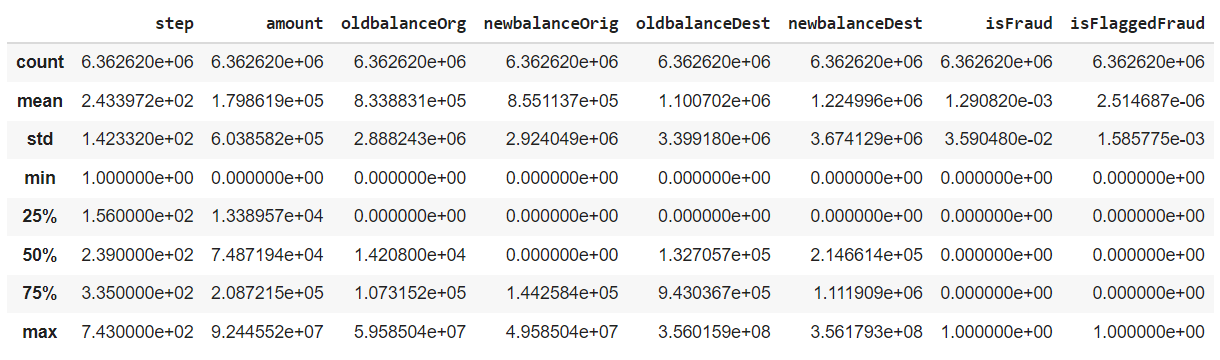

E também:

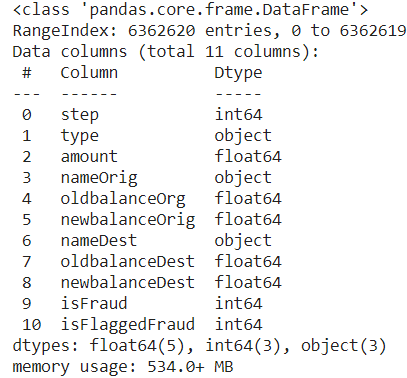

Não havia duplicatas ou nulos na tabela portanto nao precisou-se de tratar estes casos.

## VISUALIZANDO OS DADOS

Essa é uma parte importante quando se trata de qualquer análise de dados pois aqui podemos perceber padrões ou ter uma noção de quantidade e escala de certos aspectos no dataset em que estamos trabalhando. Vamos começar visualizando as variáveis categóricas.

Visualização dos tipos de transação e suas respectivas quantidades:

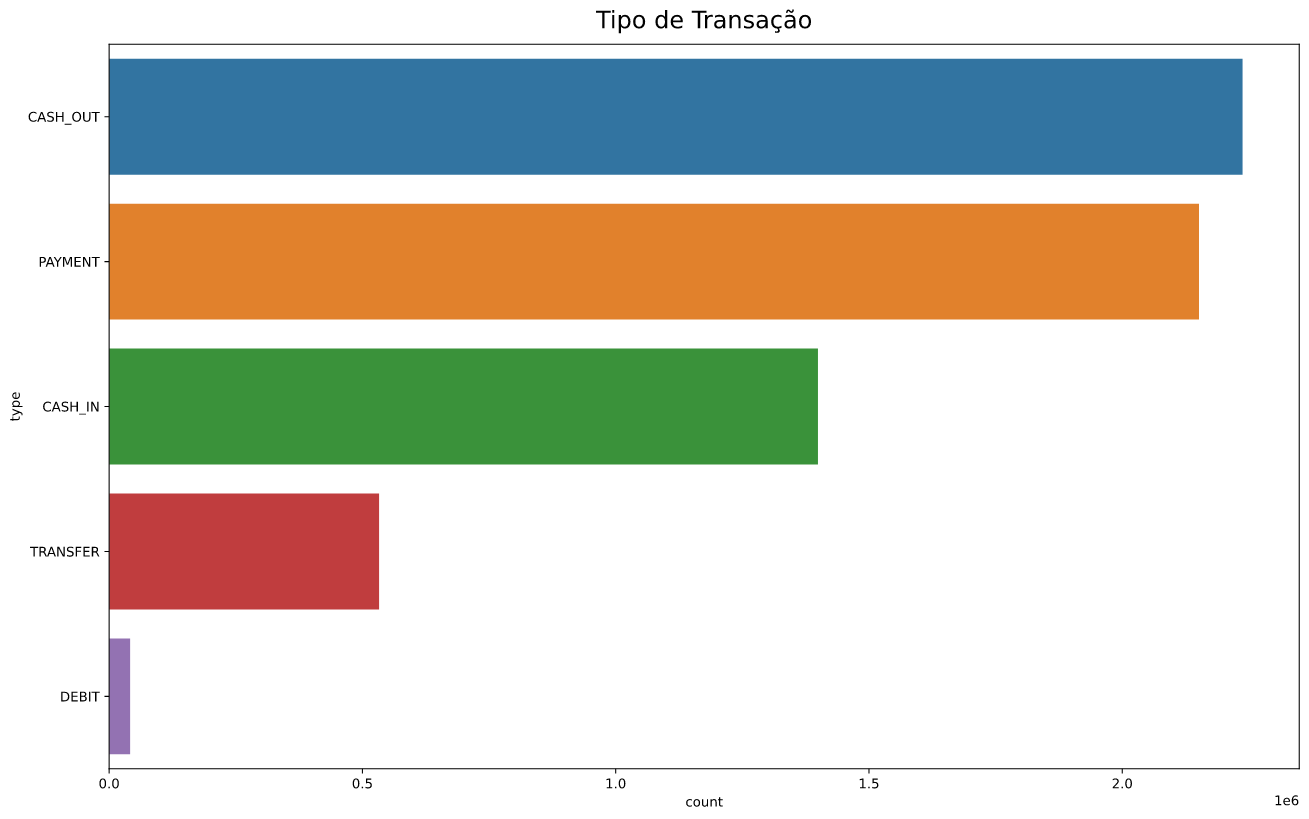

Visualização a quantidade de **C**lientes(indivíduos) e **M**ercadores(estabelecimentos) envolvidos nas transações:

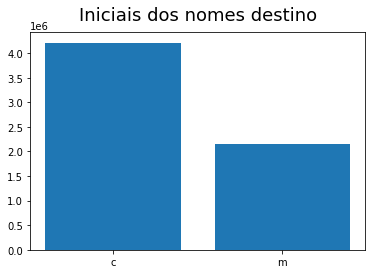

Vamos agora visualizar as variaveis numericas:

Visualização da variável **amount**:

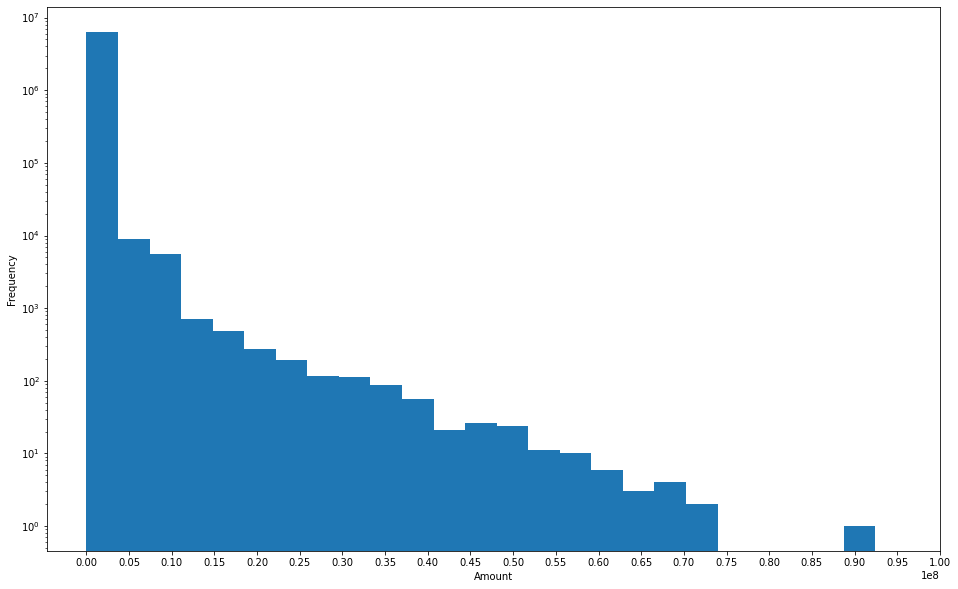

Visualização da variável **oldbalanceOrg**:

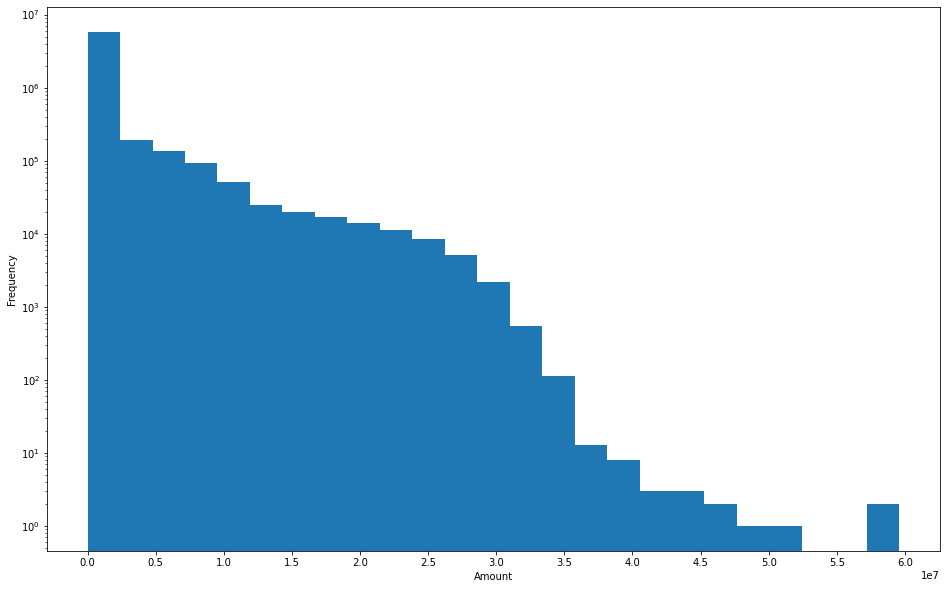

Visualização da variável **newbalanceOrig**:

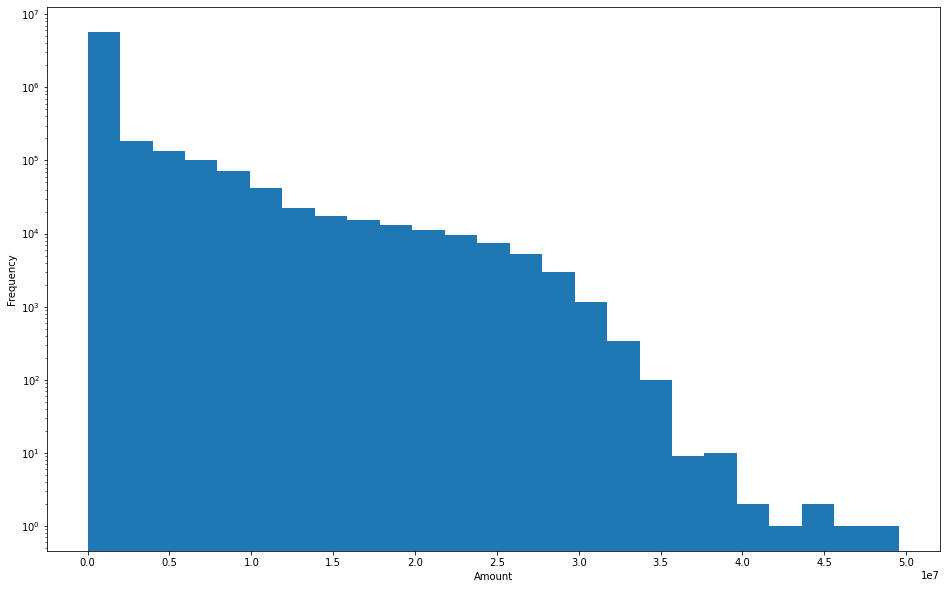

Visualização da variável **oldbalanceDest**:

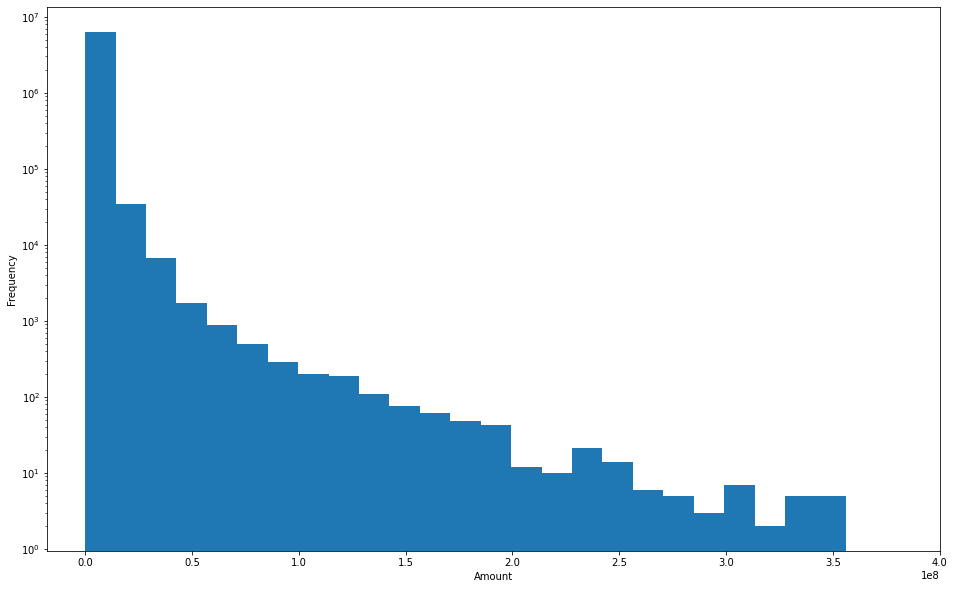

Visualização da variável **newbalanceDest**:

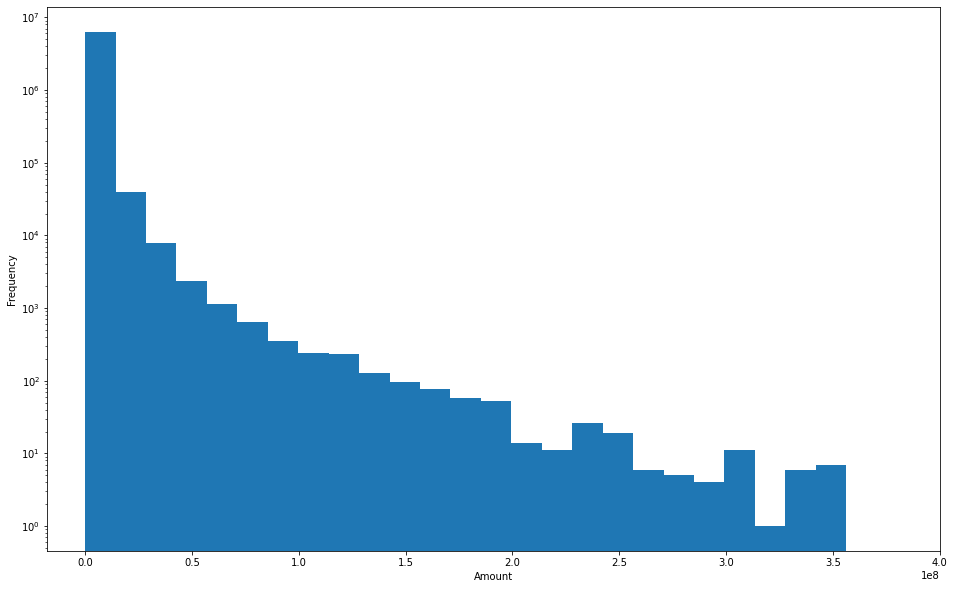

## TESTE DE HIPÓTESES

### **Hipótese 1**

**hipoteste nula:** A diferença das médias de ocorrência de fraudes entre Cash_Out e Transfer pode ser explicados pela variabilidade natural

**hipotese alternativa:** A diferença das médias de ocorrência de fraudes entre Cash_Out e Transfer não pode ser explicados pela variabilidade natural

Primeiramente queremos ver se há algum padrão nas fraudes e, de fato (após tirar uma média), há:

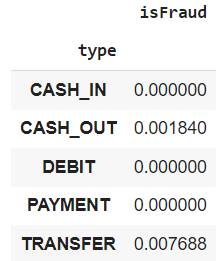

Podemos ver que fraudes só ocorrem nas transações de CASH_OUT e TRANSFER

Agora, depois de um teste de permutação e identificação de limites nós conseguimos ver que a **hipótese alternativa** é a correta:

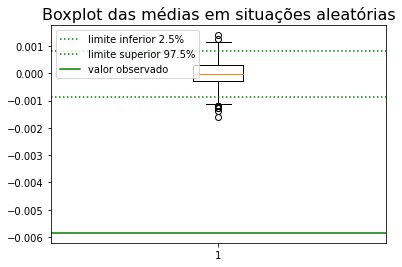

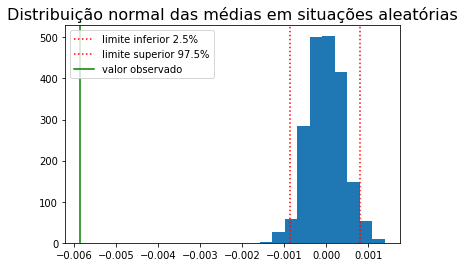

### **Hipótese 2**

Fazendo $1$ como a ocorrência de fraude e $0$ como a não ocorrência de fraude, podemos modelar:

*   O grupo de transações que esgotam o saldo como $X_1, ..., X_m \overset{idd}{\sim} \text{Ber}(p_{total})$;

*   O grupo de transações que não esgotam o saldo como $Y_1, ..., Y_n \overset{idd}{\sim} \text{Ber}(p_{not\;total})$.

Nossa meta é utilizar essas informações para responder a **questão de interesse**: 

**Uma transação que esgota o saldo de uma conta tem maior probabilidade de ser uma fraude?**

Para essa questão, temos respectivamente as hipóteses nula e alternativa:

$\quad \quad H_{0}: p_{total} = p_{not\;total},\quad  H_{1}: p_{total} > p_{not\;total}$ 

O teste adotado para essa hipotese está abaixo:

$\quad \quad \psi = 1\Biggr(\dfrac{2(\overline{X}_m - \overline{Y}_n)}{\sqrt{\frac{1}{m} + \frac{1}{n}}} > 1.96\Biggr)$ 

*a fórmula para esse teste provém de um intervalo de 95% de confiança conservador utilizando o método conservativo*.

Como temos que apenas as transações de saque e de transeferência podem ser consideradas fraudes,o teste é aplicado apenas nessas duas ocasiões. Após as contas temos que: **A hipótese nula foi rejeitada. Portanto uma transação que esgota o saldo de uma conta tem maior probabilidade de ser uma fraude.**

### **Hipótese 3**

Fazendo $1$ a pessoa que cometeu pelo menos uma fraude e $0$ como a pessoa que não cometeu fraudes, podemos modelar:

*   O grupo amostral de pessoas como $X_1, ..., X_n \overset{idd}{\sim} \text{Ber}(p_{start})$;


Sendo $Y$ o conjunto de pessoas que cometeteram fraudes, faremos agora $1$ para a pessoa que cometeu mais de uma fraude e $0$ para a que apenas cometeu apenas uma. Podemos modelar:

*   As pessoas que cometeram pelo menos uma fraude como $Y_1, ..., Y_m \overset{idd}{\sim} \text{Ber}(p_{after})$.

sendo que $n \geq m$.

Nossa meta é utilizar essas informações para responder a **questão de interesse**: 

**Uma pessoa que originou uma fraude tem tendência a originar novas fraudes?**

Para essa questão, temos respectivamente as hipóteses nula e alternativa:

$\quad \quad H_{0}: p_{start} = p_{after},\quad  H_{1}: p_{start} < p_{after}$ 

O teste adotado para essa hipotese está abaixo:

$\quad \quad \psi = 1\Biggr(\dfrac{2(\overline{Y}_m - \overline{X}_n)}{\sqrt{\frac{1}{m} + \frac{1}{n}}} > 1.96\Biggr)$ 

*a fórmula para esse teste provém de um intervalo de 95% de confiança conservador utilizando o método conservativo*.

Como temos que apenas as transações de saque e de transeferência podem ser consideradas fraudes,o teste é aplicado apenas nessas duas ocasiões. Após as contas temos que:**A hipótese nula não foi rejeitada. Portanto o fato de uma origem ou destino já ter se envolvido em uma fraude não aumenta a probabilidade de ocorrências de novas fraudes.**

## PREPARAÇÃO DOS DADOS

Antes de chegarmos no nosso modelo temos que primeiro preparar os dados pois, como percebemos na visualização, temos alguns outliers e dados não normalizados. 

### **Normalização Logarítimica**

Começaremos pela normalização logarítimica e iremos ver as características dos dados após:

Variável **amount** após normalização

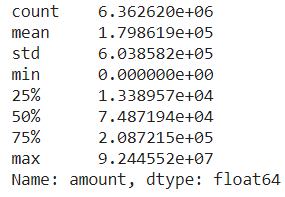

Variável **oldbalanceOrg** após normalização

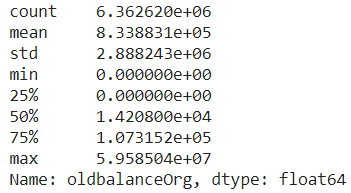

Variável **newbalanceOrig** após normalização

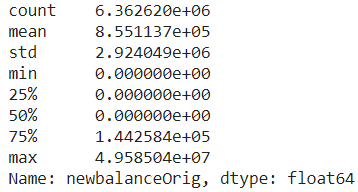

Variável **oldbalanceDest** após normalização

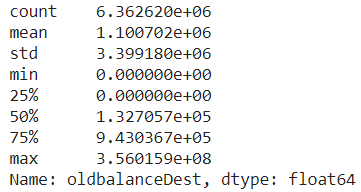

Variável **newbalanceDest** após normalização

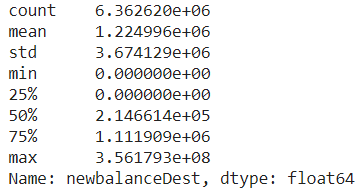

Todos tem como valor mínimo 0. log 0 é impossível, logo deve-se mudar os valores para retirar o 0 antes de mudar a escala para logarítmica.

### **Separação dos dados**

Tambem temos que separar nossos dados em 3 grupos: Treino, Teste e Validação. 60% dos dados serão usados no grupo de treinamento, 25% no grupo de validação e 15% no grupo de teste.

### **Padronização**

O próximo passo é padronizar ambas as variáveis contínuas e discretas e, após o uso de um scaler, os dados ficam com essa aparência:

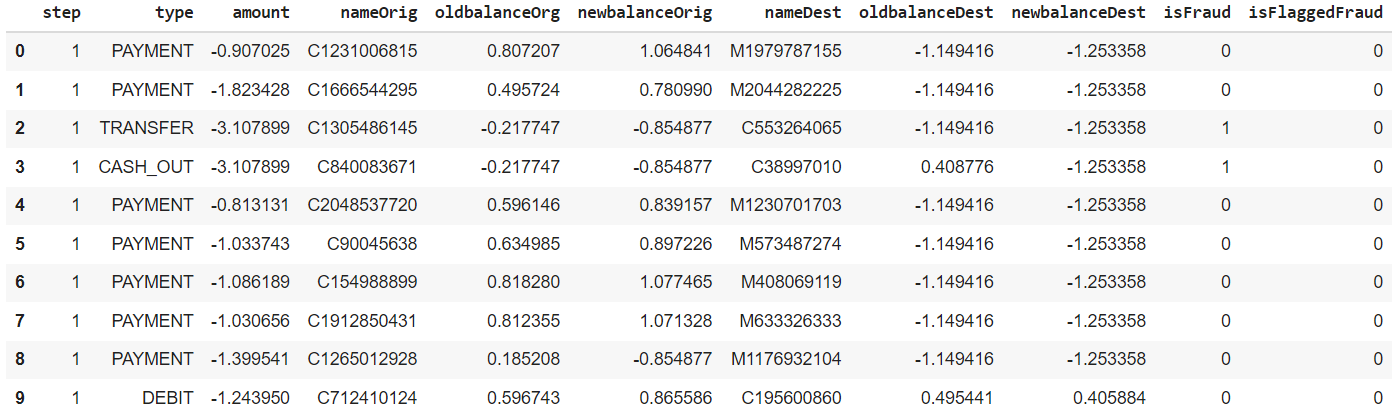

### **Tratamento de Variáveis Categóricas**

Após o tratamento, os nossos dados de teste estão com uma aparência tal:

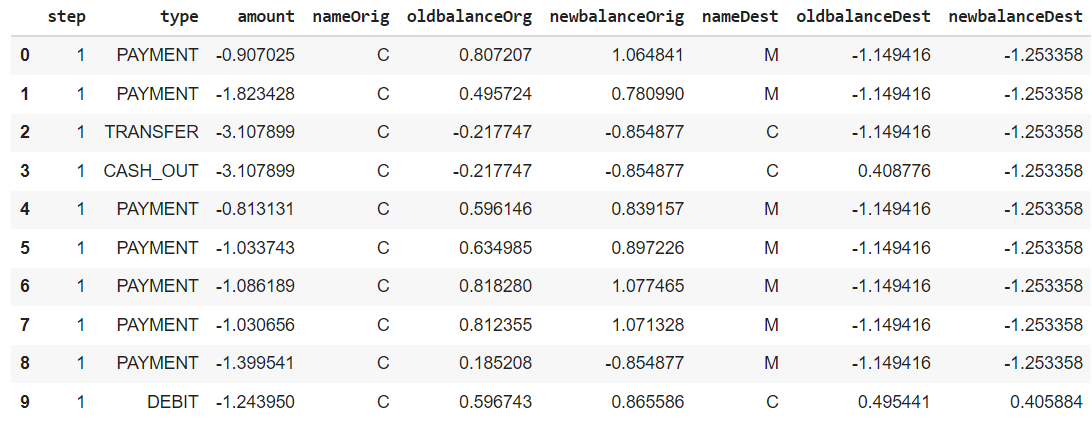

### **Ajustes Finais**

Após usar um Encoder(OneHotEncoder) e alguns outros ajustes finais nós finalmente estamos prontos para nossos modelos.

## OS MODELOS

### **Regressão Logística**

Este modelo utiliza Regressão Logística para prever futuras fraudes. Primeiramente utilizamos um treino com dados não balanceados e depois, ao testar o modelo, plotamos a matriz de confusão e temos:

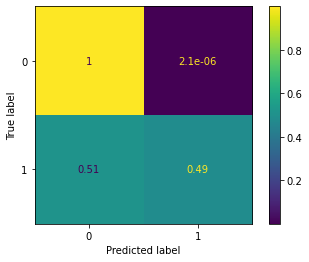

O resultado parece não muito bom a primeiro ver considerando a probabilidade de se achar uma fraude corretamente é apenas 49%. Mas, temos mais um passo a fazer, no caso, utilizar dados balanceados no treinamento. Com isso, no teste, finalmente temos a matriz de confusão:

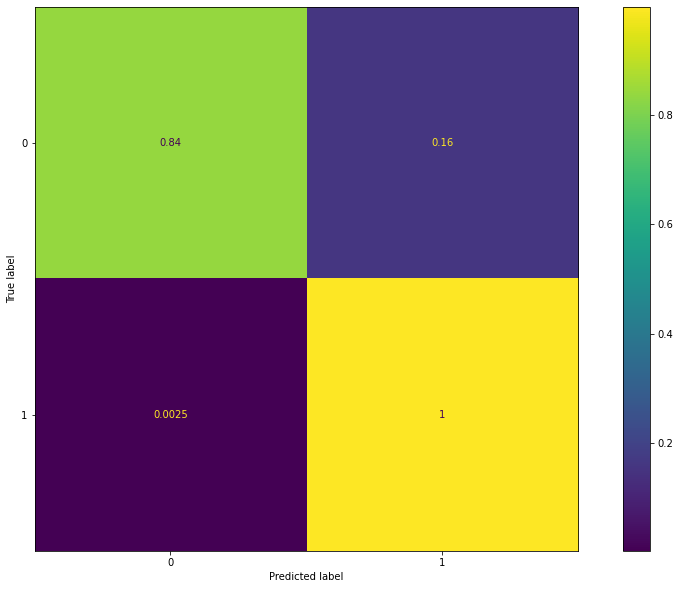

Com isso temos 84% de chance de identificar casos de transações não fraudulentas corretamente e perto de 100% de identificar fraude corretamente.

### **Rede Neural MLP**

Primeiramente treinamos nossa rede neural com um certo número definido de neurônios utilizando os dados balanceados e depois plotamos sua matriz de confusao com os dados de validação e depois com os de teste. Vemos entao o resultado de acordo com o número de neurônios:

Modelo com 1 neurônio:

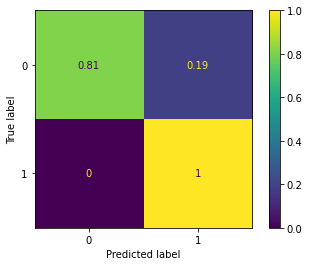

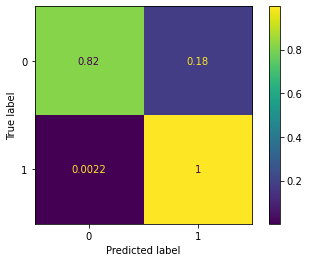

Modelo com 2 neurônios:

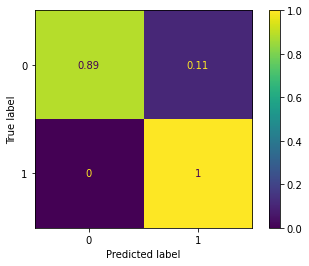

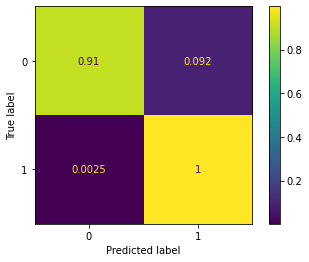

Modelo com 5 neurônios:

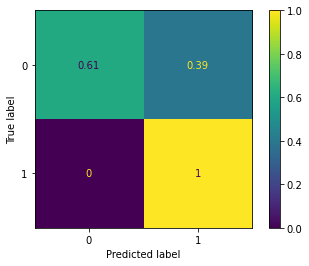

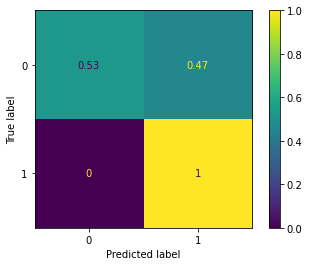

Modelo com 15 neurônios: 

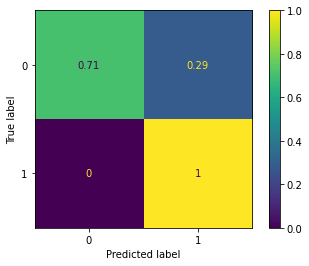

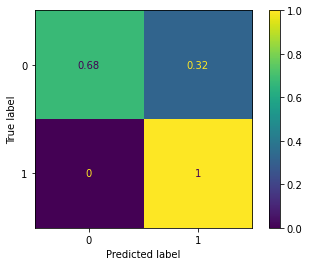

Modelo com 25 neurônios:

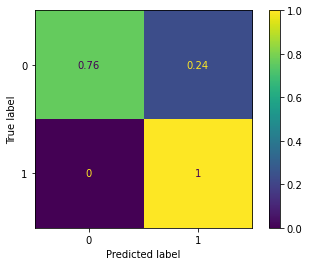

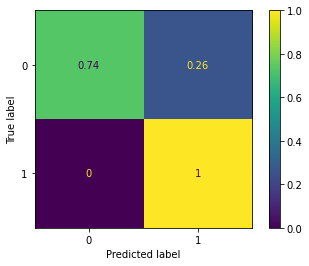

Modelo com 30 neurônios:

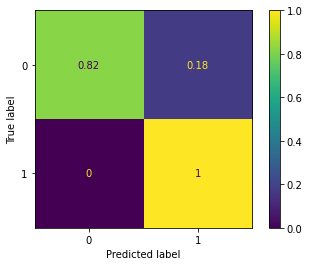

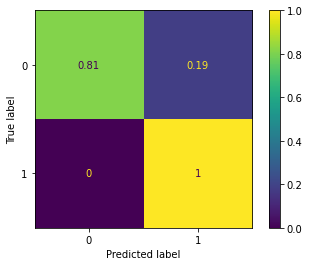

Com isso nós utilizamos a melhor versão da rede com 2 neurônios, com as seguintes matrizes de confusão:

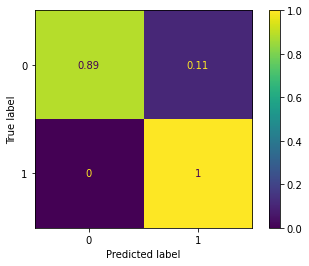

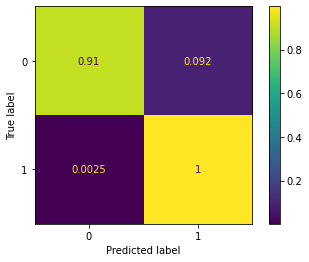

Boostrap do modelo MLP:

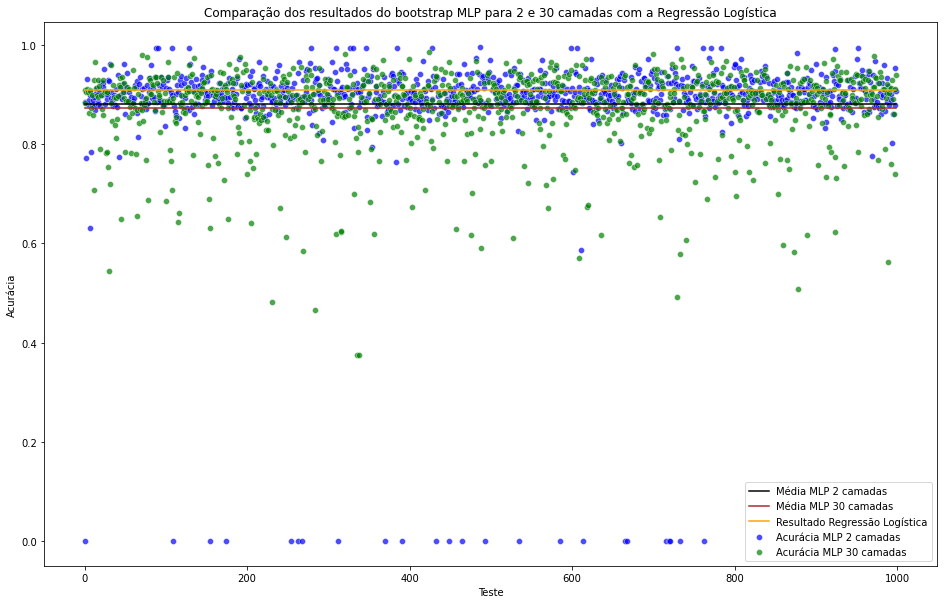

## CONCLUSÃO


### **Comparação com Hipóteses**

Primeiramente vamos analisar nosso modelo de Regressão e o peso(coeficiente) dado para cada um dos tipos de transação e comparar com nossa hipótese:

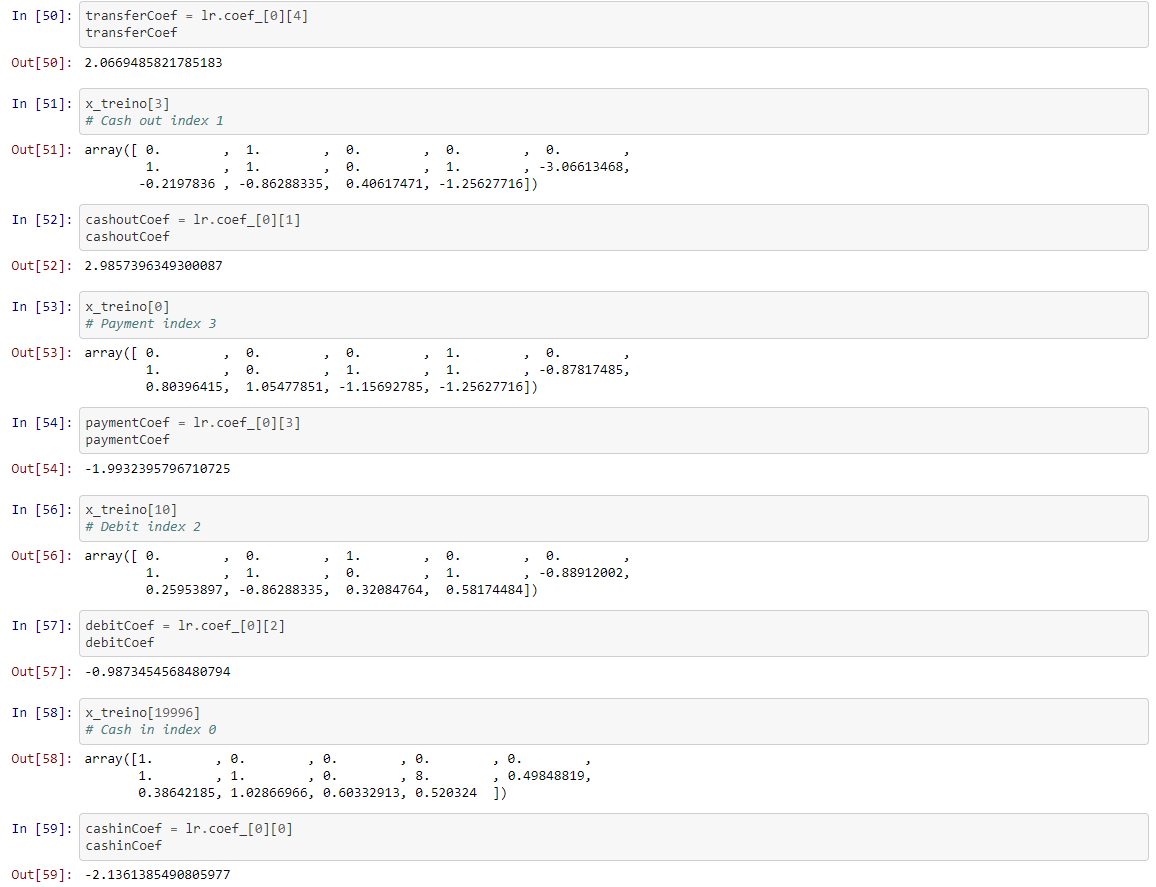

Vendo os coeficientes da nossa regressão logística foi possível reafirmar nossos testes de hipótese. Os coeficientes de tipos de transação que não são os de transferência ou de saque são negativos, contribuindo para que a saída seja 0 (não fraude). Já os coeficientes de tipos de transação de transferência ou de saque são positivos, contribuindo para que a saída seja 1 (fraude). Vimos que a probabilidade de uma transferência ser fraude é maior que a de saque, contudo o coeficiente do saque é maior que o da transferência, isso pode ser explicado pelo fato das outras váriaveis serem dependentes da váriavel de tipo de transação.

### **Respondendo Perguntas Guias**

-Qual a Precisão e Acurácia do modelo?

> R: No caso da regressão logística, nossa precisão é de aproximadamente 0,862
e acurácia é de aproximadamente 0,92. Para a rede neural nós temos precisão de aproximadamente 0,915 e acurácia de 0,955

-Qual a Confiabilidade do modelo em classificar as transações como legítimas ou fraudulentas?

> R: O modelo de regressão logística tem confiabilidade em classificar transações legítimas de 84% e fraudes de aproximadamente 100%. Já a rede neural classifica não fraudulentas com 91% de confiabilidade e fraudulentas com quase 100%.

-Imaginando que somos uma empresa de detecção de fraudes e sob as seguintes condicoes (utilizando o modelo de regressão logística): 

*  A empresa vai receber 25% do valor de cada transação detectada verdadeiramente como fraude.
*  A empresa vai receber 2% do valor de cada transação detectada verdadeiramente como legítima.
*  A empresa vai devolver 5% do valor para o cliente, a cada transação detectada como fraude, porém a transação é verdadeiramente legítima.
*  A empresa vai devolver 100% do valor para o cliente, a cada transação detectada como legítima, porém a transação é verdadeiramente uma fraude.

-Qual o Faturamento Esperado pela Empresa se classificarmos 100% das transações com o modelo?

> R: O resultado esperado de lucro é 4.662.745.125,90 em cima dos valores de teste.

-Qual o Prejuízo Esperado pela Empresa em caso de falha do modelo?

> R: Considerando falha do modelo como 0% de acurácia (errar todas as previsões), o resultado esperado de prejuízo seria de 14.028.146.116,78 em cima dos valores de teste.

-Qual o Lucro Esperado ao utilizar o modelo?

> R: Desconsiderando o fato de os valores serem em moedas locais, o lucro esperado seria de 2.170.636.804,46 para todos os dados de teste.